<a href="https://colab.research.google.com/github/CodeMaster092/Machine_Learning/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching the data

In [ ]:
import os
import urllib.request
import tarfile

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT+"20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT+"20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()
        
            

In [ ]:
fetch_spam_data()

Loading the data

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name)>20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) >20]

In [ ]:
len(ham_filenames), type(ham_filenames)

(2500, list)

In [ ]:
len(spam_filenames)

500

In [ ]:
import email
import email.policy

def load_email(is_spam, filename, spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory,filename),"rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    

In [ ]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [ ]:
type(ham_emails), print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


(list, None)

In [ ]:
print(spam_emails[1].get_content().strip())

1) Fight The Risk of Cancer!
http://www.adclick.ws/p.cfm?o=315&s=pk007

2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days
http://www.adclick.ws/p.cfm?o=249&s=pk007

3) Get the Child Support You Deserve - Free Legal Advice
http://www.adclick.ws/p.cfm?o=245&s=pk002

4) Join the Web's Fastest Growing Singles Community
http://www.adclick.ws/p.cfm?o=259&s=pk007

5) Start Your Private Photo Album Online!
http://www.adclick.ws/p.cfm?o=283&s=pk007

Have a Wonderful Day,
Offer Manager
PrizeMama













If you wish to leave this list please use the link below.
http://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258


-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List maintainer: listmaster@linux.ie


 Let's look at the various types of structures we have:

In [ ]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(",".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [ ]:
from collections import Counter
def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] +=1
    return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain,application/pgp-signature)', 66),
 ('multipart(text/plain,text/html)', 8),
 ('multipart(text/plain,text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain,application/octet-stream)', 2),
 ('multipart(text/plain,text/enriched)', 1),
 ('multipart(text/plain,application/ms-tnef,text/plain)', 1),
 ('multipart(multipart(text/plain,text/plain,text/plain),application/pgp-signature)',
  1),
 ('multipart(text/plain,video/mng)', 1),
 ('multipart(text/plain,multipart(text/plain))', 1),
 ('multipart(text/plain,application/x-pkcs7-signature)', 1),
 ('multipart(text/plain,multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('multipart(text/plain,multipart(text/plain,text/plain),multipart(multipart(text/plain,application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain,application/x-java-applet)', 1)]

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain,text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain,image/jpeg)', 3),
 ('multipart(text/html,application/octet-stream)', 2),
 ('multipart(text/plain,application/octet-stream)', 1),
 ('multipart(text/html,text/plain)', 1),
 ('multipart(multipart(text/html),application/octet-stream,image/jpeg)', 1),
 ('multipart(multipart(text/plain,text/html),image/gif)', 1),
 ('multipart/alternative', 1)]

In [ ]:
for header, value in spam_emails[0].items():
    print(header,':', value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [ ]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails+spam_emails, dtype = object)
y = np.array([0]* len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting HTML to plain text

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [ ]:
html_spam_emails = [email for email in X_train[y_train==1] if get_email_structure(email) == "text/html"]
type(html_spam_emails), len(html_spam_emails)

(list, 150)

In [ ]:
sample_html_spam=html_spam_emails[7]
print(sample_html_spam.get_content().strip())
#type(sample_html_spam.get_content()), type(sample_html_spam.get_content())  # getcontent() converts the email datatype to str datatype
# and strip just removes or truncates the given characters from beginning and end 

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

# Now displaying the plain text

In [ ]:
type(sample_html_spam), type(sample_html_spam.get_payload()), type(sample_html_spam.get_content()), sample_html_spam.get_payload() == sample_html_spam.get_content()

#get_content method belongs to email.message.EmailMessage class and get_payload() belongs to email.message.Message
# get_payload is a legacymethod and On the EmailMessage class its functionality is replaced by get_content() and iter_parts().

(email.message.EmailMessage, str, str, False)

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content().strip()))


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

# Writing a function to convert to text to handle all formats

In [ ]:
def email_to_text(email):
    html = None
   # i = 0
    for part in email.walk():  #walk()
       # i = i + 1
        ctype = part.get_content_type()
        #print(ctype, i, part)
        if not ctype in ("text/plain", "text/html"):  # returning the control to next iteration if the part is not plain text or html
            continue
        try:  
            content = part.get_content()
        except: #incase of coding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            return html_to_plain_text(content)
    
            
            

In [ ]:
print(email_to_text(sample_html_spam)[:100]) 


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat


In [ ]:
import nltk
stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))  # stemming is the process of producing morphological variants of a root/base word
        # A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [ ]:
%pip install -q -U urlextract

In [ ]:
try:
    import urlextract
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except: 
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


# We are ready to put all this together into a transformer that we will use to convert emails to word counters.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case    = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        text = ""
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(urls), reverse = True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())  #creating a counter object from the text 
           # print(type(word_counts))
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():  #items returns the key value pair of a dictionary
                   # print(type(word), type(count))
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count #creates the counter objects here which contain the stemmed word and occurances
                word_counts = stemmed_word_counts
                #print(type(word_counts))
                X_transformed.append(word_counts)
                #type(X_transformed)
        return np.array(X_transformed)  #convert the Counter object to array
        

In [ ]:
X_few = X_train[:3]
X_few_word_counts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_word_counts
#type(X_few_word_counts)
#X_few

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

# converting these word counts to vectors

In [ ]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
       # print(type(total_count))
        for word_count in X:   # loop for each email object . Here X is an array of Counter Objects, so word_count is an Counter object
            #print(type(word_count), type(X))
            for word, count in word_count.items():
                total_count[word] += min(count, 10)  # for some reason we are restricting the counting to 10. if the value is >10 then also the value is assigned as 10
        most_common = total_count.most_common(self.vocabulary_size)   #[:self.vocabulary_size]  
        #most_common() -> Return a list of the n most common elements and their counts from the most common to the least. 
        #print(total_count.most_common(self.vocabulary_size) == total_count.most_common()[:self.vocabulary_size])
        #print(most_common)
        self.vocabulary_ = {word:index+1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):  #loop through the list of each counter object
            for word, count in word_count.items():  #loop through each key and pair in the counter object
                rows.append(row)  #indiacting the row i.e., the email 
                cols.append(self.vocabulary_.get(word,0))  #searching the word in the vocabulary_ dictionary for its index
               # print(self.vocabulary_.get(word,0))
                data.append(count)  #indicating the count
        #print(len(X))
        print(rows, '\n',cols, '\n',data)
        return csr_matrix((data, (rows,cols)), shape = (len(X), self.vocabulary_size+1))
                
                

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_word_counts)
X_few_vectors

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 6, 1, 0, 0, 2, 0, 3, 0, 0, 0, 7, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
type(X_few_vectors), X_few_vectors.toarray()

(scipy.sparse.csr.csr_matrix,
 array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
        [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]]))

What does this matrix mean? Well, the 99 in the second row, first column, means that the second email contains 99 words that are not part of the vocabulary. The 11 next to it means that the first word in the vocabulary is present 11 times in this email. The 9 next to it means that the second word is p
resent 9 times, and so on. You can look at the vocabulary to know which words we are talking about. The first word is "the", the second word is "of", etc.

In [ ]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

#Creating a Data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([("EmailToWordCounterTransformer", EmailToWordCounterTransformer()),
                                ("WordCounterToVectorTransformer", WordCounterToVectorTransformer(vocabulary_size=500))])
X_train_transformed = preprocess_pipeline.fit_transform(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Creating a Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv =10, verbose = 3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.992) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.971) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.992) total time=   0.8s
[CV] END ................................ score: (test=0.983) total time=   0.7s
[CV] END ................................ score: (test=0.988) total time=   1.0s
[CV] END ................................ score: (test=0.975) total time=   0.9s
[CV] END ................................ score: (test=0.979) total time=   1.0s
[CV] END ................................ score: (test=1.000) total time=   0.9s
[CV] END ................................ score: (test=0.988) total time=   1.3s
[CV] END ................................ score: (test=0.996) total time=   1.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished


0.9862500000000001

In [ ]:
#now check the preciscion and recall score
from sklearn.metrics import recall_score, precision_score

X_test_transformed = preprocess_pipeline.transform(X_test)
log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
log_clf.predict(X_test_transformed[4:10])

array([1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[501,   4],
       [  2,  93]])

Text(33.0, 0.5, 'actual')

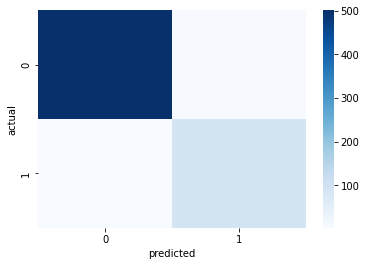

In [ ]:
import seaborn as sns
ax = sns.heatmap(cnf, cmap='Blues')
ax.set_xlabel("predicted") 
ax.set_ylabel("actual")

In [ ]:
# Conusion matrix looks good with high recall and preciscion .lets predict a test exemple
X_test[4].get_content().strip()

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n \n  GET IN WITH THE FOUNDERS! \nThe MAJOR PLAYERS are on This ONE\nFor ONCE be where the PlayerS are\nThis is YOUR Private Invitation\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \nTO HUGE CASH FLOW EVER CONCEIVED\nLeverage $1,000 into $50,000 Over and Over Again\n\nTHE QUESTION HERE IS:\nYOU EITHER WANT TO BE WEALTHY \nOR YOU DON\'T!!!\nWHICH ONE ARE YOU?\nI am tossing you a financial lifeline and for your sake I \nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\nTestimonials\n\nHear what average people are doing their first few days:\n�We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n �I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.� D. S. in FL\n�I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!� L.L. in KY\n�I didn\'t have the money, so I found myself a partner to work this with. We have rece

In [ ]:
log_clf.predict(X_test_transformed[4])

array([1])